/Users/yuvaldanino/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yuvaldanino/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yuvaldanino/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yuvaldanino/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

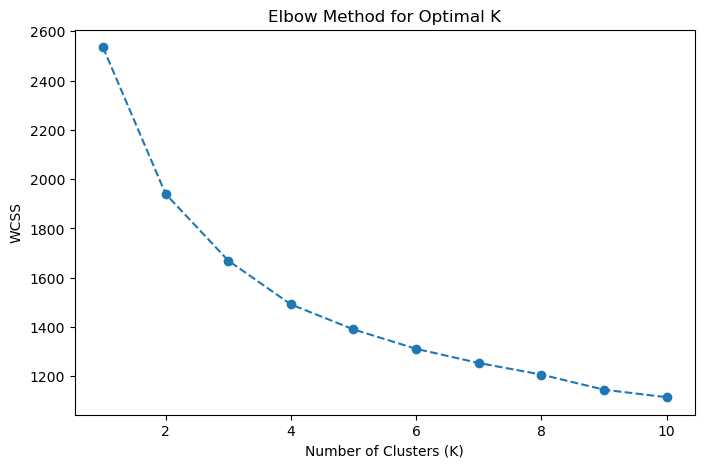

     cluster
0          1
1          0
2          2
3          1
4          8
..       ...
190        7
191        6
192        1
193        1
194        3

[195 rows x 1 columns]
   danceability    energy       key   loudness          mode  speechiness  \
0      0.785619  0.638000  4.619048  -7.526000  2.220446e-16     0.337429   
1      0.721850  0.609200  5.925000  -7.760350  1.500000e-01     0.088135   
2      0.333313  0.088452  4.000000 -25.188188  7.500000e-01     0.043906   
3      0.752000  0.766241  8.310345  -5.928621  9.310345e-01     0.180148   
4      0.578143  0.769714  3.071429  -7.531357  4.285714e-01     0.071221   
5      0.313727  0.976864  6.500000  -6.490955  4.090909e-01     0.113536   
6      0.757400  0.687350  6.400000  -9.556750  7.500000e-01     0.065780   
7      0.238500  0.260737  8.125000 -20.595875  6.250000e-01     0.064000   
8      0.783320  0.599680  2.160000  -8.055000  1.000000e+00     0.287440   

   acousticness  instrumentalness  liveness   val

/Users/yuvaldanino/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('data.csv')  # Replace 'your_song_data.csv' with your dataset's file path

# Select the relevant attributes for clustering (exclude 'liked' as it's the target variable)
X = data.drop('liked', axis=1)

# Data preprocessing: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (K)
# You can use the Elbow Method to find the optimal K value
wcss = []  # Within-Cluster-Sum-of-Squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph to determine K
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Based on the Elbow graph, choose an appropriate value of K
k = 9  # You should replace this with the number of clusters you determine

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataset
data['cluster'] = kmeans.labels_

# Print the cluster assignments for each song
print(data[['cluster']])  # Replace 'song_title' with the actual column name for song titles

# Optionally, you can analyze the clusters and their characteristics
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
print(cluster_centers)
print(data)
# Visualize the clusters in a reduced dimension space (e.g., 2D or 3D) using PCA or t-SNE

# Additional analysis, evaluation, and interpretation as needed
